In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import NullFormatter
import os

In [65]:
results_dir = '../simods_hessian_results/'

In [66]:
def save(directory, fig_name, fig):
    plt.figure(fig)
    if not os.path.exists(directory):
        os.makedirs(directory)

    plt.savefig(os.path.join(directory, fig_name), bbox_inches='tight')

In [67]:
def load_spectrums(results_dir, dataset, epoch):
    # Load spectra
    spectra = np.load(os.path.join(results_dir, dataset, f'hessian_spectrum_{epoch}.csv.npy'))
    spectra_precond = np.load(os.path.join(results_dir, dataset, f'hessian_precond_spectrum_{epoch}.csv.npy'))

    spectra = np.sort(spectra)[::-1]
    spectra_precond = np.sort(spectra_precond)[::-1]

    return spectra, spectra_precond

In [68]:
def plot_spectra_epoch(results_dir, dataset, epoch):
    # # Load spectra
    # spectra = np.load(os.path.join(results_dir, dataset, f'hessian_spectrum_{epoch - 1}.csv.npy'))
    # spectra_precond = np.load(os.path.join(results_dir, dataset, f'hessian_precond_spectrum_{epoch - 1}.csv.npy'))

    # spectra = np.sort(spectra)[::-1]
    # spectra_precond = np.sort(spectra_precond)[::-1]

    spectra, spectra_precond = load_spectrums(results_dir, dataset, epoch)

    plt.figure()
    plt.semilogy(spectra, label='Hessian')
    plt.semilogy(spectra_precond, label='Preconditioned Hessian')
    plt.legend(fontsize=14)
    plt.xlabel(r'$k$', fontsize=14)
    plt.ylabel(r'$\lambda_{k+1}$', fontsize=14)
    plt.title(dataset+f', epoch {epoch}', fontsize=14)
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=14)

    save('./hessians', f'{dataset}_epoch_{epoch}_hessian_spectra.pdf', plt.gcf())

    plt.figure()
    plt.semilogy(spectra[0] / spectra, label='Hessian')
    plt.semilogy(spectra_precond[0] / spectra_precond, label='Preconditioned Hessian')
    plt.legend(fontsize=14)
    plt.xlabel(r'$k$', fontsize=14)
    plt.ylabel(r'$\lambda_1/\lambda_k$', fontsize=14)
    plt.title(dataset+f', epoch {epoch}', fontsize=14)
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=14)

    save('./hessians', f'{dataset}_epoch_{epoch}_hessian_spectra_ratio.pdf', plt.gcf())

In [69]:
def plot_multiple_spectra(results_dir, datasets, regularizations, epoch, yaxis):
    n_datasets = len(datasets)
    fig, axes = plt.subplots(1, n_datasets, figsize=(n_datasets*4, 3))

    legend_elements = []
    legend_elements.append(Line2D([0], [0], color = 'tab:blue', label='Hessian'))
    legend_elements.append(Line2D([0], [0], color = 'tab:orange', label='Preconditioned Hessian'))

    for i, (dataset, regularization) in enumerate(zip(datasets, regularizations)):
        spectra, spectra_precond = load_spectrums(results_dir, dataset, epoch)

        if yaxis['name'] == 'spectrum':
            axes[i].semilogy(spectra / spectra[0], label='Hessian')
            axes[i].semilogy(spectra_precond / spectra_precond[0], label='Preconditioned Hessian')
            # axes[i].semilogy(regularization / spectra[0] * np.ones(spectra.shape[0]), color = 'tab:blue', linestyle='--')
        elif yaxis['name'] == 'conditioning':
            axes[i].semilogy(spectra[0] / spectra, label='Hessian')
            axes[i].semilogy(spectra_precond[0] / spectra_precond, label='Preconditioned Hessian')

        axes[i].set_title(dataset+f', epoch {epoch}', fontsize=14)
        axes[i].set_xlabel(r'$k$', fontsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=14)
    
    fig.tight_layout(pad=2.0)
    
    # Add legend to the bottom of the grid
    fig.legend(handles = legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.00), ncol=3, fontsize=14)

    fig.text(0, 0.5, yaxis['label'], va='center', rotation='vertical', fontsize=14)

    save('./hessians', f'{"_".join(datasets)}_epoch_{epoch}_{yaxis["name"]}.pdf', fig)

In [70]:
def plot_multiple_spectra_multi_rows(results_dir, dataset_rows, regularization_rows, epoch, yaxis):
    n_rows = len(dataset_rows)
    n_datasets = len(dataset_rows[0])
    fig, axes = plt.subplots(n_rows, n_datasets, figsize=(n_datasets*4, n_rows*3))

    legend_elements = []
    legend_elements.append(Line2D([0], [0], color = 'tab:blue', label='Hessian'))
    legend_elements.append(Line2D([0], [0], color = 'tab:orange', label='Preconditioned Hessian'))

    for i, (d_row, r_row) in enumerate(zip(dataset_rows, regularization_rows)):
        for j, (dataset, regularization) in enumerate(zip(d_row, r_row)):
            spectra, spectra_precond = load_spectrums(results_dir, dataset, epoch)

            # print(f'{dataset}: {spectra[0]}') # Print largest eigenvalue of spectrum
            # print(f'{dataset}: {spectra_precond[0]}') # Print largest eigenvalue of preconditioned spectrum

            if yaxis['name'] == 'spectrum':
                axes[i, j].semilogy(spectra / spectra[0], label='Hessian')
                axes[i, j].semilogy(spectra_precond / spectra_precond[0], label='Preconditioned Hessian')
                # axes[i].semilogy(regularization / spectra[0] * np.ones(spectra.shape[0]), color = 'tab:blue', linestyle='--')
            elif yaxis['name'] == 'conditioning':
                axes[i, j].semilogy(spectra[0] / spectra, label='Hessian')
                axes[i, j].semilogy(spectra_precond[0] / spectra_precond, label='Preconditioned Hessian')

            axes[i, j].set_title(dataset+f', epoch {epoch}', fontsize=14)
            axes[i, j].set_xlabel(r'$k$', fontsize=14)
            axes[i, j].tick_params(axis='both', which='major', labelsize=14)
    
    fig.tight_layout(pad=2.0)
    
    # Add legend to the bottom of the grid
    fig.legend(handles = legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.00), ncol=3, fontsize=14)

    fig.text(0, 0.5, yaxis['label'], va='center', rotation='vertical', fontsize=14)

    save('./hessians', f'all_epoch_{epoch}_{yaxis["name"]}.pdf', fig)

In [71]:
# Render plots in LaTeX
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

In [72]:
yaxes = [{'name': 'spectrum', 'label': r'$\lambda_{k+1}/\lambda_1$'},
        {'name': 'conditioning', 'label': r'$\lambda_1/\lambda_{k+1}$'}]

In [73]:
# plot_multiple_spectra_multi_rows(results_dir, 
#                                 [['ijcnn1', 'real-sim', 'susy'], ['e2006', 'yearpredictionmsd', 'yolanda']],
#                                 0, yaxes[1])

## Logistic

### Epoch 0

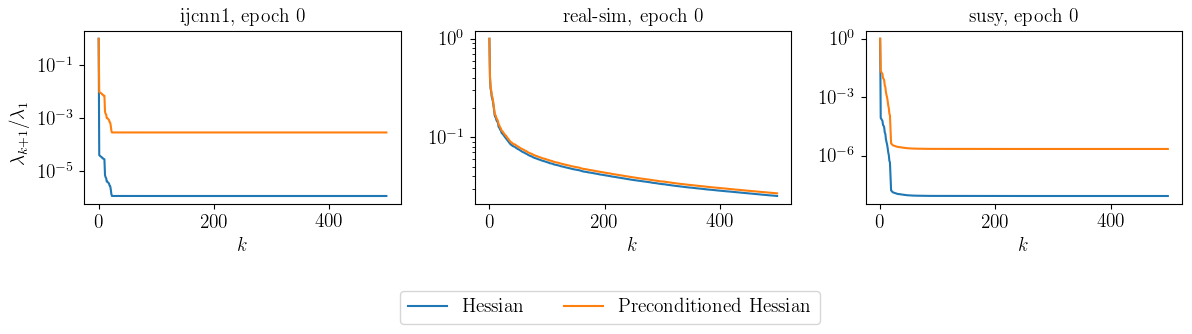

In [74]:
plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], [1e-2/49990, 1e-2/57847, 1e-2/4.5e6], 0, yaxes[0])
# plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], 0, yaxes[1])

### Epoch 10

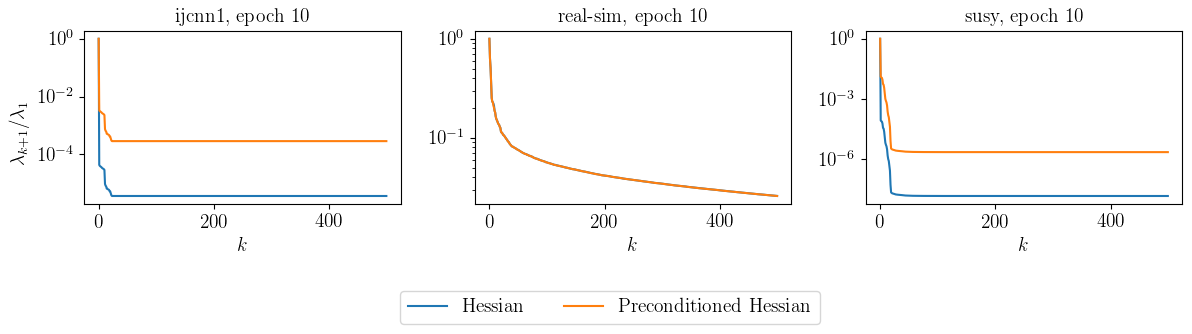

In [75]:
plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], [1e-2/49990, 1e-2/57847, 1e-2/4.5e6], 10, yaxes[0])
# plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], 10, yaxes[1])

### Epoch 20

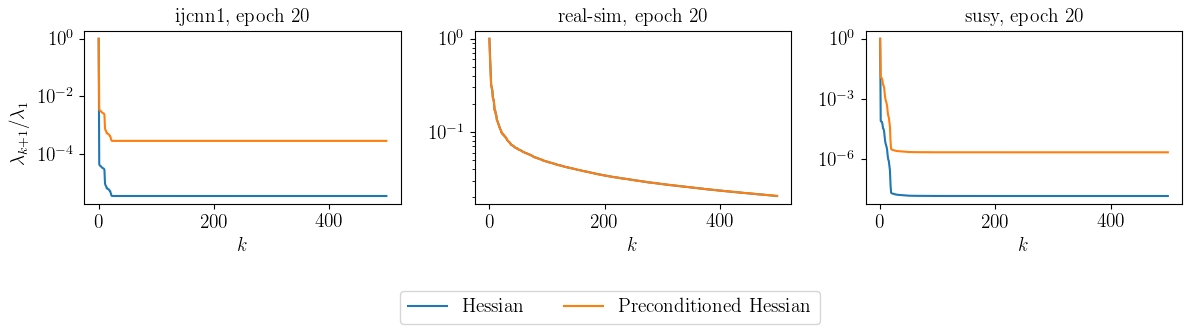

In [76]:
plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], [1e-2/49990, 1e-2/57847, 1e-2/4.5e6], 20, yaxes[0])
# plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], 20, yaxes[1])

### Epoch 30

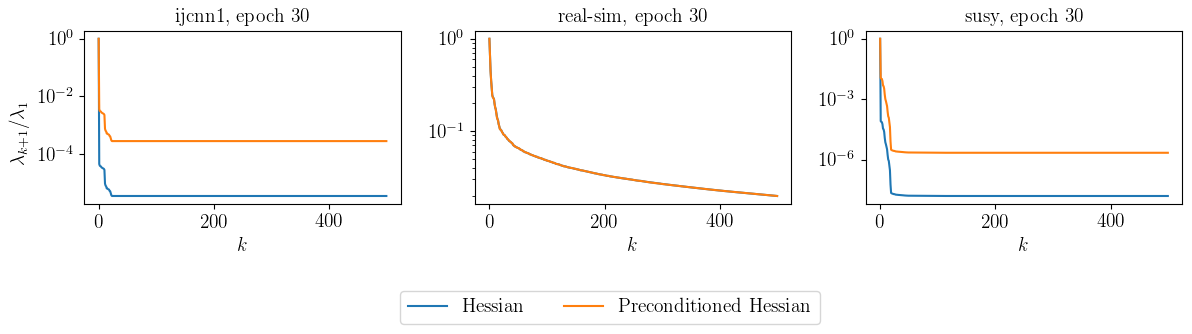

In [77]:
plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], [1e-2/49990, 1e-2/57847, 1e-2/4.5e6], 30, yaxes[0])
# plot_multiple_spectra(results_dir, ['ijcnn1', 'real-sim', 'susy'], 30, yaxes[1])

## Least squares

### Epoch 0

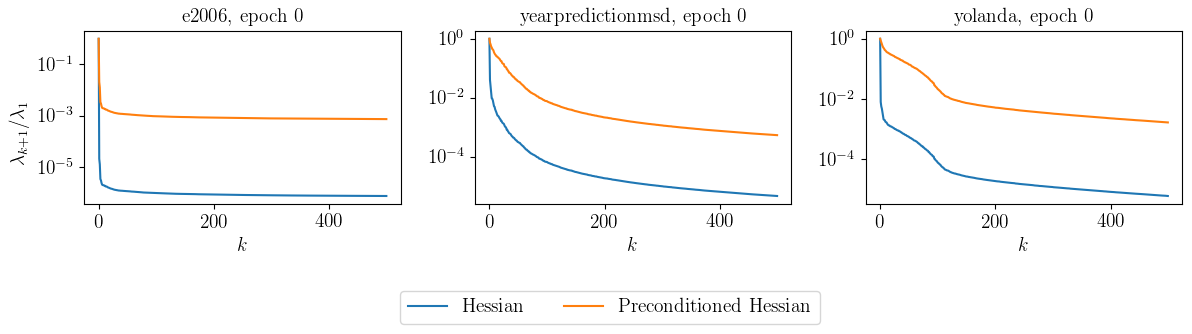

In [78]:
plot_multiple_spectra(results_dir, ['e2006', 'yearpredictionmsd', 'yolanda'], [1e-2/16087, 1e-2/463715, 1e-2/320000], 0, yaxes[0])
# plot_multiple_spectra(results_dir, ['e2006', 'yearpredictionmsd', 'yolanda'], 0, yaxes[1])

## ijcnn1

In [79]:
# plot_spectra_epoch(results_dir, 'ijcnn1', 0)
# plot_spectra_epoch(results_dir, 'ijcnn1', 10)

## real-sim

In [80]:
# plot_spectra_epoch(results_dir, 'real-sim', 0)
# plot_spectra_epoch(results_dir, 'real-sim', 10)

## susy

In [81]:
# plot_spectra_epoch(results_dir, 'susy', 0)
# plot_spectra_epoch(results_dir, 'susy', 10)

## e2006

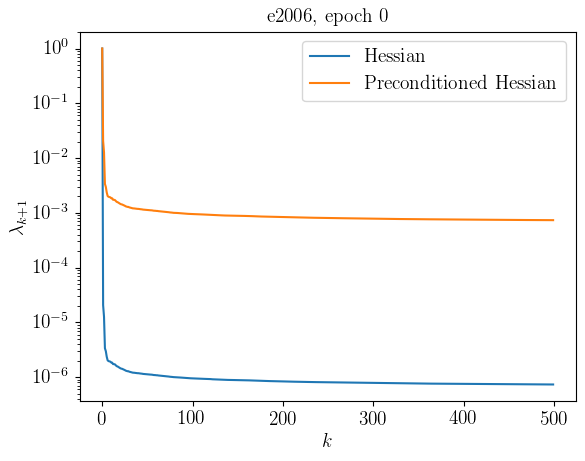

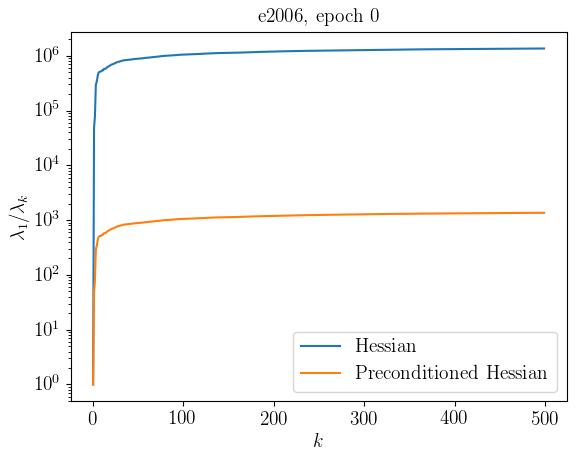

In [82]:
plot_spectra_epoch(results_dir, 'e2006', 0)

## yearpredictionmsd

In [83]:
# plot_spectra_epoch(results_dir, 'yearpredictionmsd', 0)

## yolanda

In [84]:
# plot_spectra_epoch(results_dir, 'yolanda', 0)